In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/all-pokemon-with-stats/PokemonDb.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("../input/all-pokemon-with-stats/PokemonDb.csv")

In [4]:
data.head().style.set_properties(**{"background-color": "#ff4654","color": "black","border-color": "black"})

,Name,Variation,Type1,Type2,Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed
0,Bulbasaur,nan,Grass,Poison,318,45,49,49,65,65,45
1,Ivysaur,nan,Grass,Poison,405,60,62,63,80,80,60
2,Venusaur,nan,Grass,Poison,525,80,82,83,100,100,80
3,Venusaur,Mega,Grass,Poison,625,80,100,123,122,120,80
4,Charmander,nan,Fire,nan,309,39,52,43,60,50,65


In [5]:
data.shape

(1071, 11)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1071 entries, 0 to 1070
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       1071 non-null   object
 1   Variation  197 non-null    object
 2   Type1      1071 non-null   object
 3   Type2      579 non-null    object
 4   Total      1071 non-null   int64 
 5   HP         1071 non-null   int64 
 6   Attack     1071 non-null   int64 
 7   Defense    1071 non-null   int64 
 8   Sp.Atk     1071 non-null   int64 
 9   Sp.Def     1071 non-null   int64 
 10  Speed      1071 non-null   int64 
dtypes: int64(7), object(4)
memory usage: 92.2+ KB


In [7]:
data.isnull().sum()

Name           0
Variation    874
Type1          0
Type2        492
Total          0
HP             0
Attack         0
Defense        0
Sp.Atk         0
Sp.Def         0
Speed          0
dtype: int64

In [8]:
import missingno as msno

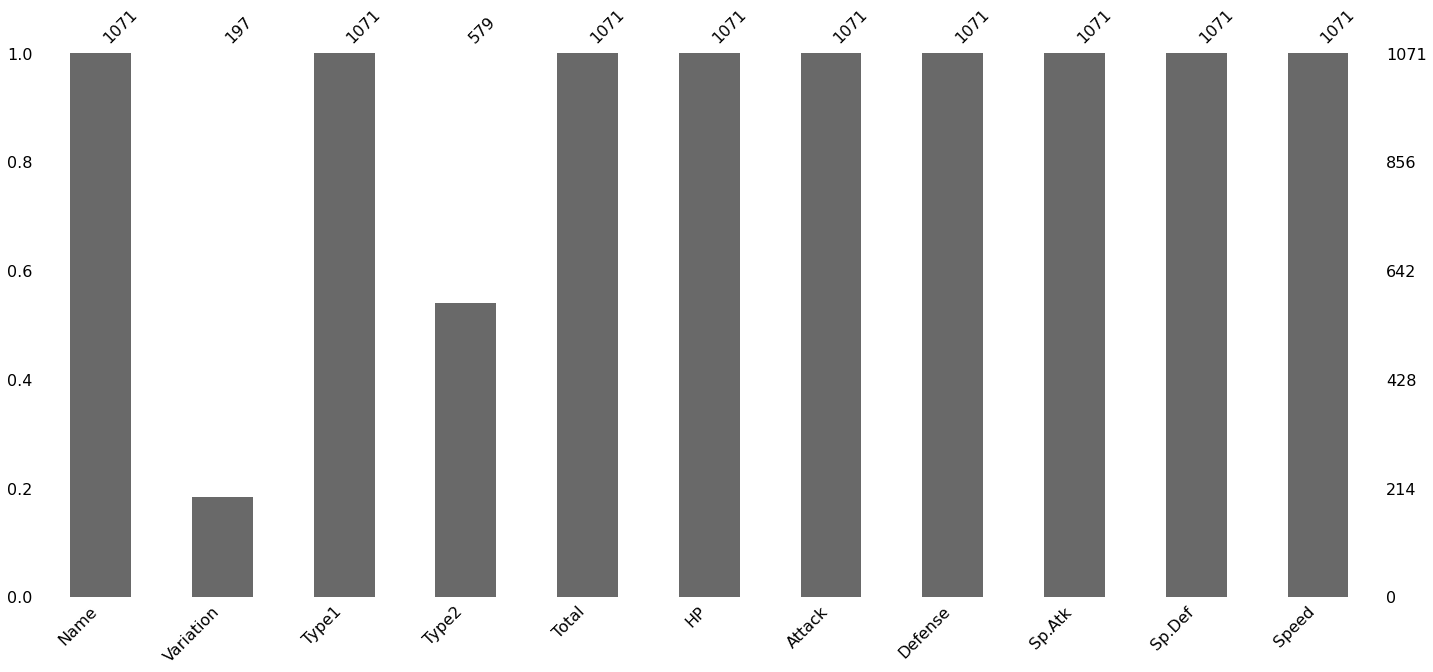

In [9]:
msno.bar(data)
plt.show()

In [10]:
df = data.copy()

In [11]:
data = data.drop(['Variation','Type2'],axis=1)

In [12]:
data.head()

,Name,Type1,Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed
0,Bulbasaur,Grass,318,45,49,49,65,65,45
1,Ivysaur,Grass,405,60,62,63,80,80,60
2,Venusaur,Grass,525,80,82,83,100,100,80
3,Venusaur,Grass,625,80,100,123,122,120,80
4,Charmander,Fire,309,39,52,43,60,50,65


In [13]:
data.dtypes

Name       object
Type1      object
Total       int64
HP          int64
Attack      int64
Defense     int64
Sp.Atk      int64
Sp.Def      int64
Speed       int64
dtype: object

In [14]:
data.nunique()

Name       904
Type1       19
Total      216
HP         103
Attack     123
Defense    114
Sp.Atk     121
Sp.Def     107
Speed      127
dtype: int64

# Top 10 high HP pokemon name

In [15]:
high_hp = data[['Name','HP']].sort_values(ascending=False,by='HP')

In [16]:
high_hp

,Name,HP
294,Blissey,255
1031,Eternatus,255
147,Chansey,250
931,Guzzlord,223
841,Zygarde,216
...,...,...
416,Feebas,20
426,Duskull,20
64,Diglett,10
63,Diglett,10


In [17]:
top_10_hp_pokemon_name = high_hp.nlargest(10, 'HP')

In [18]:
top_10_hp_pokemon_name

,Name,HP
294,Blissey,255
1031,Eternatus,255
147,Chansey,250
931,Guzzlord,223
841,Zygarde,216
1037,Regidrago,200
249,Wobbuffet,190
386,Wailord,170
698,Alomomola,165
183,Snorlax,160


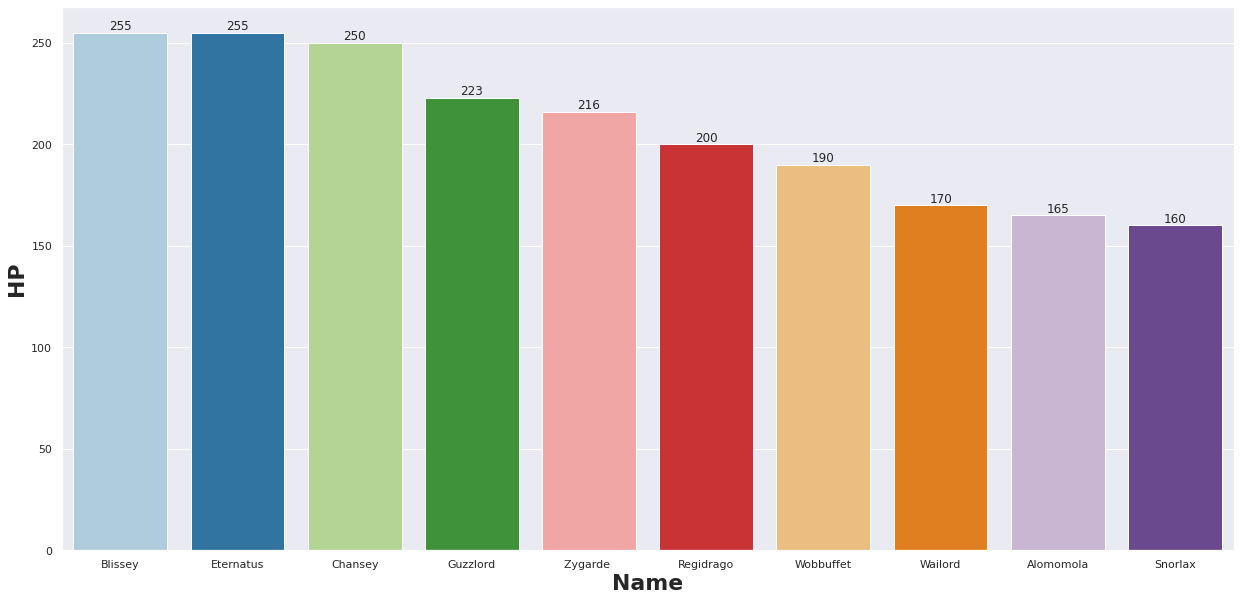

In [19]:
sns.set(rc = {'figure.figsize':(21,10)})
ax  = sns.barplot(x='Name',y='HP',data = top_10_hp_pokemon_name,palette = 'Paired')
plt.bar_label(ax.containers[0])
plt.xlabel("Name",fontweight='bold',size=22)
plt.ylabel("HP",fontweight='bold',size=22)
plt.show()

![](https://assets.pokemon.com/assets/cms2/img/pokedex/detail/242.png)

![](https://assets.pokemon.com/assets/cms2/img/pokedex/detail/890.png)

**Blissey and Eternatus has the high HP.**

# Top 10 high spAtk pokemon name

In [20]:
high_spAtk = data[['Name','Sp.Atk']].sort_values(ascending=False,by='Sp.Atk')

In [21]:
high_spAtk

,Name,Sp.Atk
195,Mewtwo,194
467,Deoxys,180
460,Kyogre,180
464,Rayquaza,180
84,Alakazam,175
...,...,...
166,Magikarp,15
524,Bonsly,10
37,Sandshrew,10
416,Feebas,10


In [22]:
top_10_spAtk_pokemon_name = high_spAtk.nlargest(10, 'Sp.Atk')

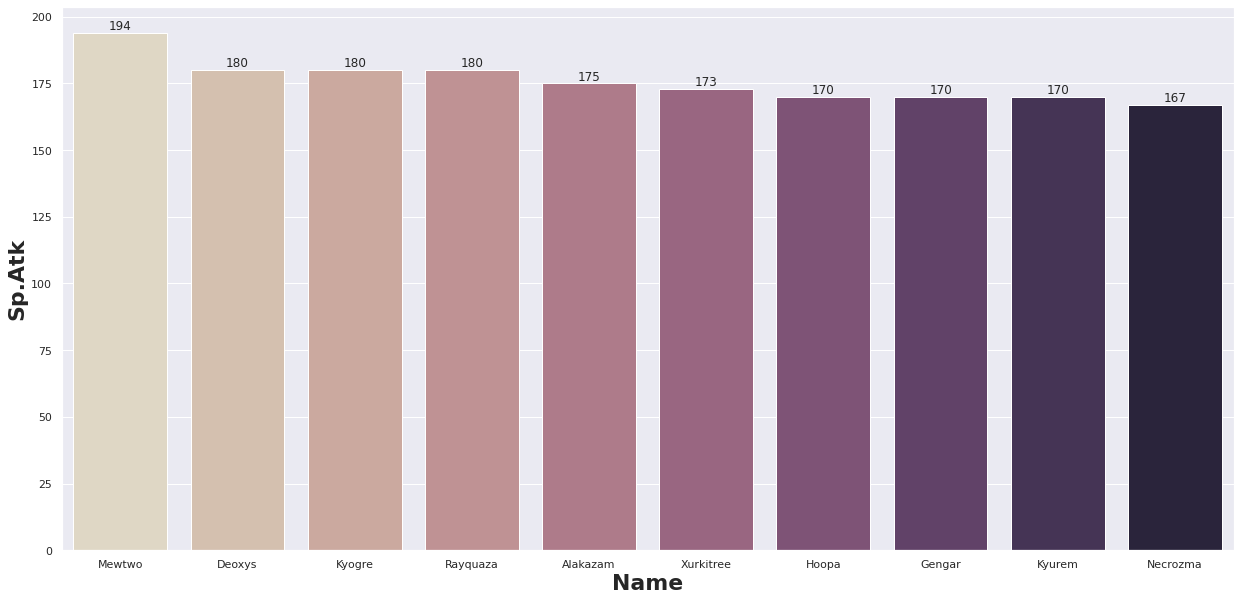

In [23]:
sns.set(rc = {'figure.figsize':(21,10)})
ax  = sns.barplot(x='Name',y='Sp.Atk',data = top_10_spAtk_pokemon_name,palette = 'ch:s=-.2,r=.6')
plt.bar_label(ax.containers[0])
plt.xlabel("Name",fontweight='bold',size=22)
plt.ylabel("Sp.Atk",fontweight='bold',size=22)
plt.show()

![](https://assets.pokemon.com/assets/cms2/img/pokedex/detail/150.png)

**Mewtwo has the high Sp.Attack...**

# Top 10 high spDef pokemon

In [24]:
high_spDef = data[['Name','Sp.Def']].sort_values(ascending=False,by='Sp.Def')

In [25]:
top_10_spDef_pokemon_name = high_spDef.nlargest(10, 'Sp.Def')

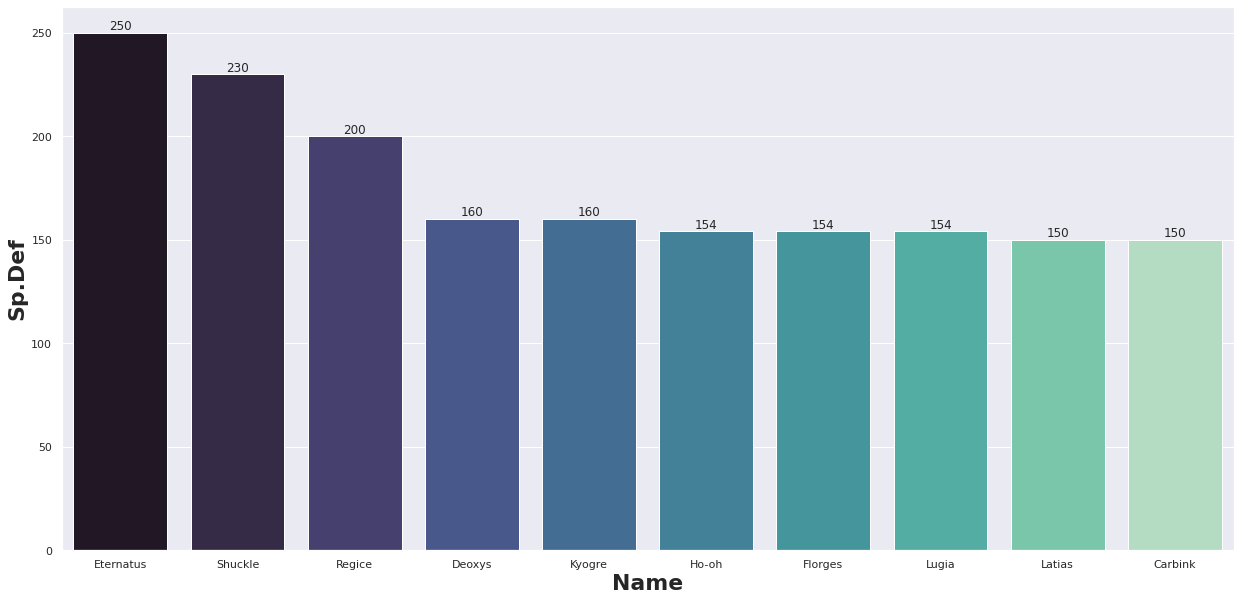

In [26]:
sns.set(rc = {'figure.figsize':(21,10)})
ax  = sns.barplot(x='Name',y='Sp.Def',data = top_10_spDef_pokemon_name,palette = 'mako')
plt.bar_label(ax.containers[0])
plt.xlabel("Name",fontweight='bold',size=22)
plt.ylabel("Sp.Def",fontweight='bold',size=22)
plt.show()

![](https://assets.pokemon.com/assets/cms2/img/pokedex/detail/890.png)

**Eternatus has the high Sp.Def...**

# Top 10 high speed pokemon name

In [27]:
high_speed = data[['Name','Speed']].sort_values(ascending=False,by='Speed')
top_10_speed_pokemon_name = high_speed.nlargest(10, 'Speed')

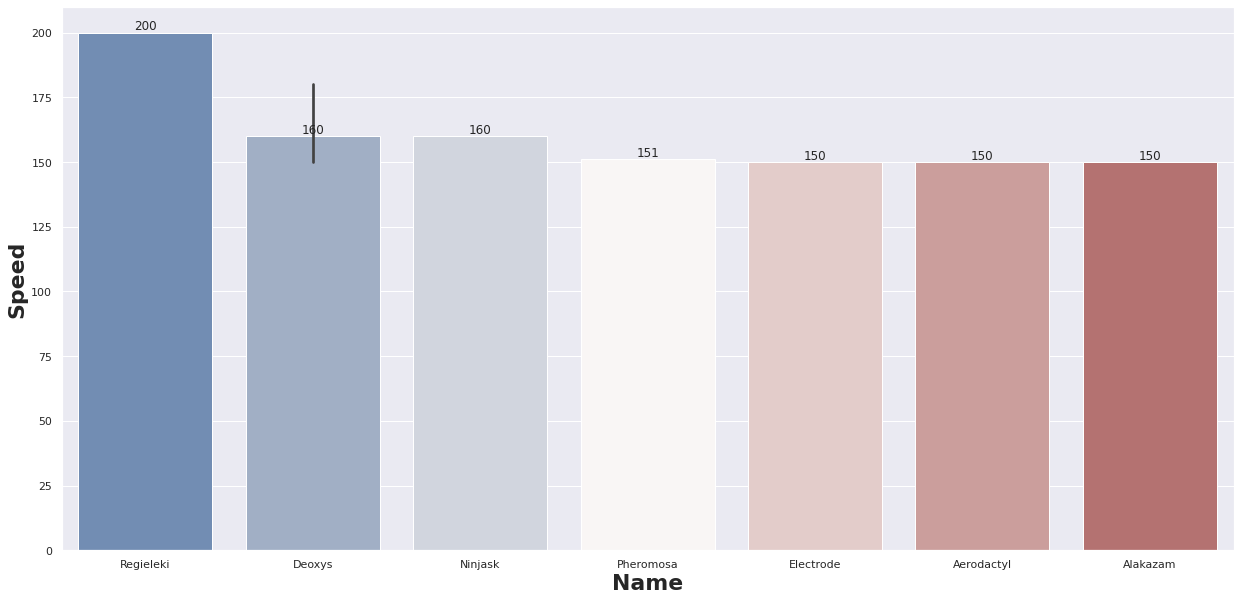

In [28]:
sns.set(rc = {'figure.figsize':(21,10)})
ax  = sns.barplot(x='Name',y='Speed',data = top_10_speed_pokemon_name,palette = 'vlag')
plt.bar_label(ax.containers[0])
plt.xlabel("Name",fontweight='bold',size=22)
plt.ylabel("Speed",fontweight='bold',size=22)
plt.show()

![](https://assets.pokemon.com/assets/cms2/img/pokedex/detail/894.png)

**Regieleki has the highest speed..**

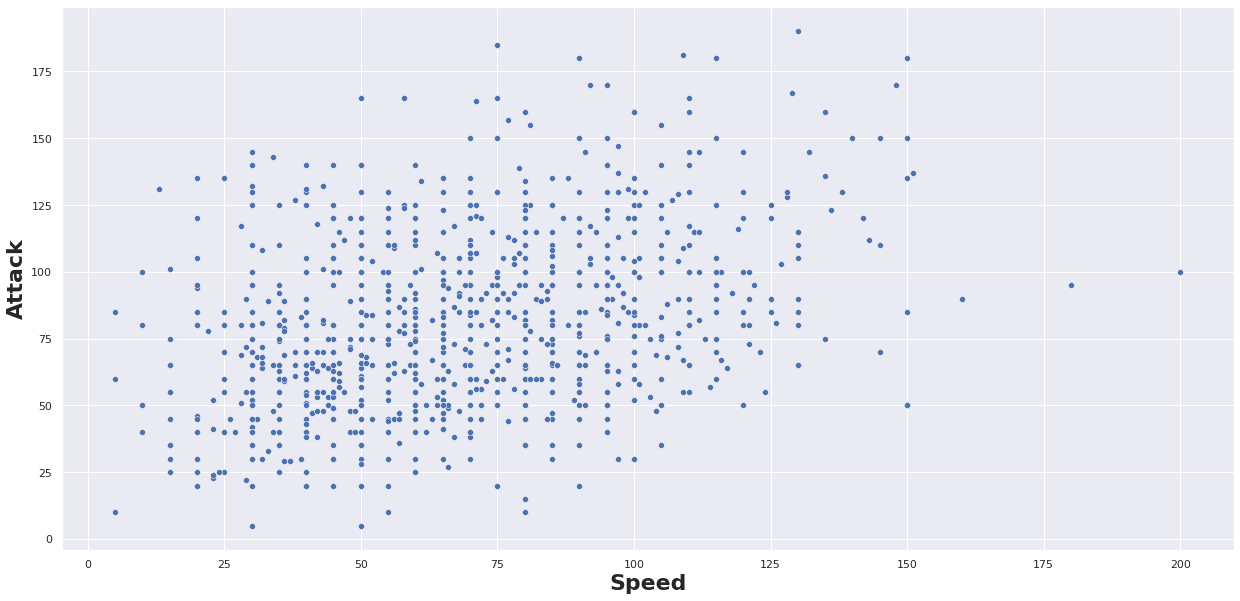

In [29]:
sns.scatterplot(x='Speed',y="Attack",data=data)
plt.xlabel("Speed",fontweight='bold',size=22)
plt.ylabel("Attack",fontweight='bold',size=22)
plt.show()

![](https://assets.pokemon.com/assets/cms2/img/pokedex/detail/025.png)

In [30]:
pikachu = (data.loc[data['Name'] == 'Pikachu'])

In [31]:
pikachu

,Name,Type1,Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed
32,Pikachu,Electric,320,35,55,40,50,50,90
33,Pikachu,Electric,430,45,80,50,75,60,120


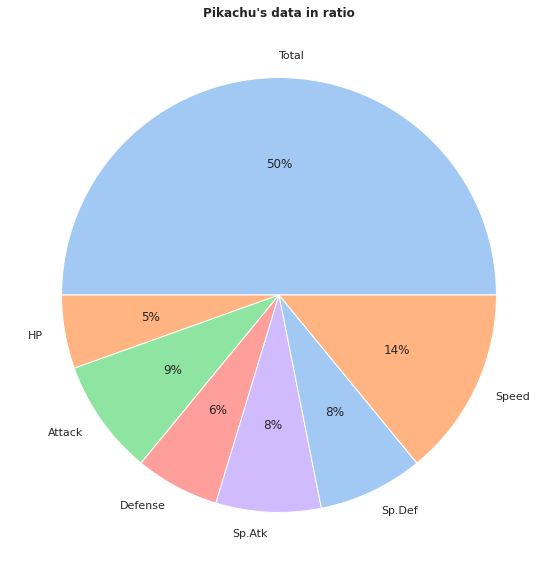

In [32]:
df = [320,35,55,40,50,50,90]
labels = ['Total','HP','Attack','Defense','Sp.Atk','Sp.Def','Speed']
colors = sns.color_palette('pastel')[0:5]
#create pie chart
plt.pie(df, labels = labels, colors = colors, autopct='%.0f%%')
plt.title("Pikachu's data in ratio",fontweight = 'bold')
plt.show()

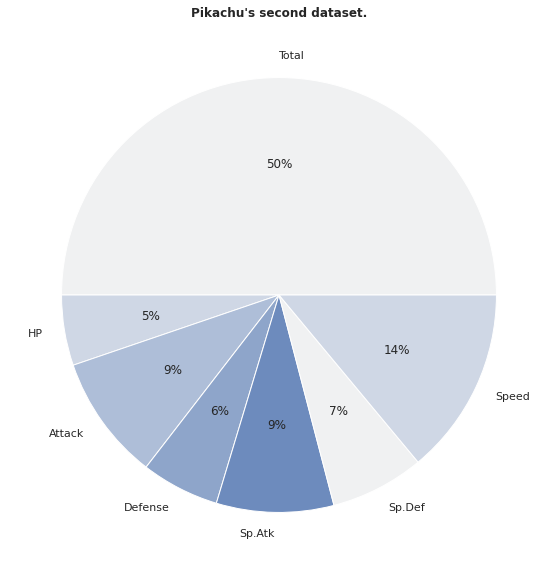

In [33]:
df = [430,45,80,50,75,60,120]
labels = ['Total','HP','Attack','Defense','Sp.Atk','Sp.Def','Speed']
colors = sns.color_palette('light:b')[0:5]
#create pie chart
plt.pie(df, labels = labels, colors = colors, autopct='%.0f%%')
plt.title("Pikachu's second dataset.", fontweight = 'bold')
plt.show()

![](https://c.tenor.com/-VYWaSmWx2QAAAAC/thunderbolt-pikachu.gif)